In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare_reviews.csv')
df.head()

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3


In [3]:
df.isnull().sum()

Review_Text    100
Rating           0
dtype: int64

In [4]:
df['Review_Text'].fillna('Not available', inplace=True)

In [5]:
df.isnull().sum()

Review_Text    0
Rating         0
dtype: int64

#### DataPreProcessing

#### created new column as Sentiment to consolidate the rating

##### 0-negative review, 1- neutral review, 2- positive review

In [6]:
df['Sentiment'] = df['Rating'].map({1:0,2:0,3:1,4:2,5:2})
print(df)

                                           Review_Text  Rating  Sentiment
0          I have mixed feelings about my experience.        4          2
1    The staff was caring and attentive. I couldn't...       5          2
2          I have mixed feelings about my experience.        5          2
3          I have mixed feelings about my experience.        5          2
4    The healthcare provider was excellent. I had a...       3          1
..                                                 ...     ...        ...
995  My experience was terrible. I would not recomm...       5          2
996  The service was disappointing. I won't be comi...       4          2
997    The service was okay, but nothing exceptional.        3          1
998        I have mixed feelings about my experience.        5          2
999  The staff was caring and attentive. I couldn't...       4          2

[1000 rows x 3 columns]


In [7]:
df.to_csv('healthcare_reviews_v1.csv', index=False, encoding='utf-8')

In [8]:
df.isnull().sum()

Review_Text    0
Rating         0
Sentiment      0
dtype: int64

#### checking the distribution of target column

In [9]:
df['Sentiment'].value_counts()

Sentiment
2    434
0    398
1    168
Name: count, dtype: int64

In [10]:
df['Rating'].value_counts()

Rating
4    223
5    211
2    209
1    189
3    168
Name: count, dtype: int64

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix 

#### stopword package download

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Parthi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Stemming

In [14]:
port_stem = PorterStemmer()

In [15]:
def stemming(review):
    stemmed_review = re.sub('[^a-zA-Z]',' ', review)
    stemmed_review = stemmed_review.lower()
    stemmed_review = stemmed_review.split()
    stemmed_review = [port_stem.stem(word) for word in stemmed_review if not word in stopwords.words('english')]
    stemmed_review = ' '.join(stemmed_review)

    return stemmed_review

In [16]:
df['stemmed_review'] = df['Review_Text'].apply(stemming)

In [17]:
df.head()

,Review_Text,Rating,Sentiment,stemmed_review
0,I have mixed feelings about my experience.,4,2,mix feel experi
1,The staff was caring and attentive. I couldn't...,5,2,staff care attent happier
2,I have mixed feelings about my experience.,5,2,mix feel experi
3,I have mixed feelings about my experience.,5,2,mix feel experi
4,The healthcare provider was excellent. I had a...,3,1,healthcar provid excel great experi


In [18]:
df.to_csv('stemmed_reviews.csv', index=False, encoding='utf-8')

In [58]:
df['Sentiment'].value_counts()

Sentiment
2    434
0    398
1    168
Name: count, dtype: int64

##### separate the column for model building

In [52]:
X= df['stemmed_review'].values
y = df['Sentiment'].values

#### TF IDF Vectorizer to convert text value to numerics value

In [48]:
tfidf_vectorizer = TfidfVectorizer() 
X_tfidf = tfidf_vectorizer.fit_transform(df['stemmed_review'])


#### SMOTE method for class imbalance

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, df['Sentiment'])

In [50]:
sentiment_distribution = y_resampled.value_counts()
print(sentiment_distribution)

Sentiment
2    434
1    434
0    434
Name: count, dtype: int64


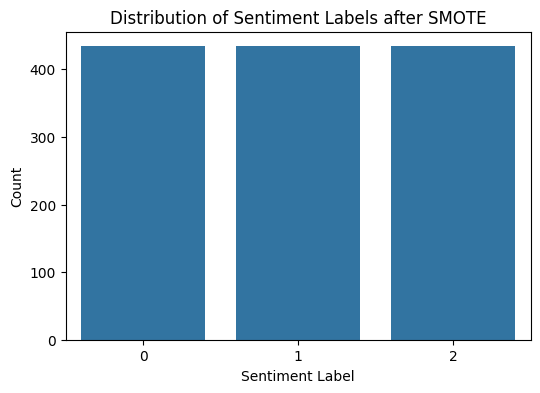

In [51]:
# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiment Labels after SMOTE')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

#### Splitting the data into training and test set 

In [25]:
from sklearn.model_selection import train_test_split

X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)

#### Naive Bayes classifier

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Initialize the Naive Bayes Classifier

nb_classifier = MultinomialNB()


In [27]:
# train the classifier on training data

nb_classifier.fit(X_resampled_train, y_resampled_train)

MultinomialNB()

In [28]:
nb_predictions = nb_classifier.predict(X_resampled_test)

# Evaluate the performance of the classifier

# Calculate accuracy score
accuracy = accuracy_score(y_resampled_test, nb_predictions)
print("Accuracy:", accuracy)

print("Naive Bayes Classification Report:")
print(classification_report(y_resampled_test, nb_predictions))

Accuracy: 0.36015325670498083
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.30      0.31        83
           1       0.40      0.67      0.50        93
           2       0.25      0.08      0.12        85

    accuracy                           0.36       261
   macro avg       0.32      0.35      0.31       261
weighted avg       0.33      0.36      0.32       261



#### Support Vector Machine

In [29]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_resampled_train, y_resampled_train)

# Predictions on the test data
svm_predictions = svm_classifier.predict(X_resampled_test)

# Evaluate the performance of the classifier
print("SVM Classification Report:")
print(classification_report(y_resampled_test, svm_predictions))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.45      0.39        83
           1       0.40      0.56      0.47        93
           2       0.20      0.06      0.09        85

    accuracy                           0.36       261
   macro avg       0.32      0.35      0.32       261
weighted avg       0.32      0.36      0.32       261



#### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)


#### hyperparameter tuning

In [31]:
# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],       
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]      
}


#### gridsearch CV

In [32]:
# Perform grid search with cross-validation (5-fold cross-validation)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1_macro')

# Fit the grid search to the training data
grid_search.fit(X_resampled_train, y_resampled_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [33]:

# Use the best model from grid search for predictions
best_rf_classifier = grid_search.best_estimator_
rf_predictions = best_rf_classifier.predict(X_resampled_test)


In [34]:
# Evaluate the performance of the best model
print("Random Forest Classification Report:")
print(classification_report(y_resampled_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.45      0.39        83
           1       0.40      0.56      0.47        93
           2       0.20      0.06      0.09        85

    accuracy                           0.36       261
   macro avg       0.32      0.35      0.32       261
weighted avg       0.32      0.36      0.32       261



#### Decision tree classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)


In [36]:
# Define the hyperparameters grid to search
param_grid_dt = {
    'max_depth': [None, 10, 20],       
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]      
}

In [37]:
# Perform grid search with cross-validation (5-fold cross-validation)
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='f1_macro')

# Fit the grid search to the training data
grid_search_dt.fit(X_resampled_train, y_resampled_train)

# Get the best hyperparameters found by grid search
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)

Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [38]:
# Use the best model from grid search for predictions
best_dt_classifier = grid_search_dt.best_estimator_
dt_predictions = best_dt_classifier.predict(X_resampled_test)

# Evaluate the performance of the best model
print("Decision Tree Classification Report:")
print(classification_report(y_resampled_test, dt_predictions))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.45      0.39        83
           1       0.40      0.56      0.47        93
           2       0.20      0.06      0.09        85

    accuracy                           0.36       261
   macro avg       0.32      0.35      0.32       261
weighted avg       0.32      0.36      0.32       261



#### Use the best parameters for new decision tree classifier

In [39]:
# Use the best hyperparameters to create a new Decision Tree classifier
best_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)

# Train the classifier on the training data
best_dt_classifier.fit(X_resampled_train, y_resampled_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# Make predictions on the test data using the best model
dt_predictions = best_dt_classifier.predict(X_resampled_test)

In [41]:
# Evaluate the performance of the best model
print("Decision Tree Classification Report:")
print(classification_report(y_resampled_test, dt_predictions))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.45      0.39        83
           1       0.40      0.56      0.47        93
           2       0.20      0.06      0.09        85

    accuracy                           0.36       261
   macro avg       0.32      0.35      0.32       261
weighted avg       0.32      0.36      0.32       261



#### classify the predicted model for new set of reviews

In [42]:
 # Sample new reviews stored in variables

review1 = "The healthcare provider was excellent. I had a great experience."
review2 = "I'm not satisfied with the service. The staff was rude and unprofessional."

# Create a list of new reviews
X_new_reviews = [review1, review2]


In [64]:
# Preprocess new reviews 
X_new_tfidf = tfidf_vectorizer.transform(X_new_reviews)

# Use the trained model to predict sentiments
new_predictions = nb_classifier.predict(X_new_tfidf) 
new_predictions1 = best_dt_classifier.predict(X_new_tfidf) 

# Interpret predictions
for review, sentiment in zip(X_new_reviews, new_predictions):
    print("Review:", review)
    print("Predicted Sentiment:", sentiment)
    print()

for review, sentiment in zip(X_new_reviews, new_predictions1):
    print("Review:", review)
    print("Predicted Sentiment:", sentiment)
    print()

Review: The healthcare provider was excellent. I had a great experience.
Predicted Sentiment: 1

Review: I'm not satisfied with the service. The staff was rude and unprofessional.
Predicted Sentiment: 0

Review: The healthcare provider was excellent. I had a great experience.
Predicted Sentiment: 2

Review: I'm not satisfied with the service. The staff was rude and unprofessional.
Predicted Sentiment: 2

